In [3]:
import xarray as xr 
import numpy as np 
import os 
# 数据处理
## 获取文件夹名称 和 所谓文件路径
init_path = r'F:\CPSv3'
all_folders_path = os.listdir(init_path)
sgl_years_files_path = [ (init_path + '\\' + folder) for folder in all_folders_path ]
all_files_path =  []
for path in sgl_years_files_path:
    single_yeas_all_data = os.listdir(path)
    all_files_path.append(single_yeas_all_data)


In [4]:
import matplotlib.pyplot as plt 
import cartopy.crs as ccrs 
import cartopy.feature as cfeature 
train_data = xr.open_dataset(sgl_years_files_path[0] + "\\"+ str(all_files_path[0][0]), engine='netcdf4')
test_data = xr.open_dataset(sgl_years_files_path[0] + "\\"+ str(all_files_path[0][4]), engine='netcdf4')
lon_max = test_data.longitude.values.max()
lon_min = test_data.longitude.values.min()
lat_max = test_data.latitude.values.max()
lat_min = test_data.latitude.values.min()

pre_data = test_data.values
lon = test_data.longitude.values
lat = test_data.latitude.values
time = test_data.time.values
# print(test_data)
# print(train_data)

In [5]:
all_time = test_data.time  

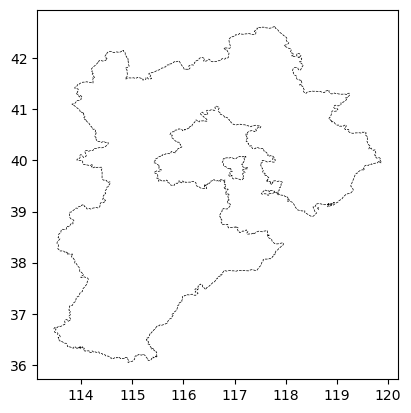

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 读取包含全中国地区数据的文件
heibei_map = gpd.read_file('hebei.json')

# 提取京津冀地区的几何数据
hebei_geometry = heibei_map.geometry.unary_union

# 创建图形和坐标轴
fig, ax = plt.subplots()
a = gpd.GeoSeries(hebei_geometry).plot(ax=ax,edgecolor='black', color='none',lw=0.5, ls='--')  # 绘制京津冀地区


C:\Users\2892706668\AppData\Local\Temp\ipykernel_8592\1437006305.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  hebei_PRECT = china_PRECT.mean(dim=['time']).interp(latitude=hebei_map.centroid.y, longitude=hebei_map.centroid.x)


ValueError: Expected a 1D array, got an array with shape (11, 11)

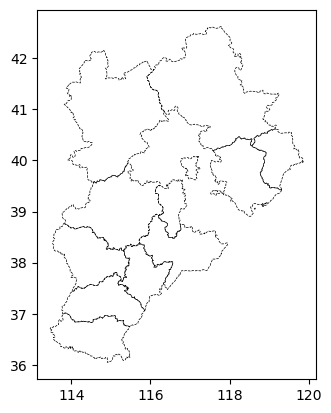

In [ ]:
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt

# 打开.nc文件并提取全中国范围内的温度数据
data = test_data
china_PRECT = data.PRECT  

# 使用geopandas加载京津冀地区的地理数据文件
hebei_map = gpd.read_file('hebei.json')
hebei_geometry = hebei_map.geometry.unary_union

# 将温度数据与地理数据进行结合，提取京津冀地区的温度数据
hebei_PRECT = china_PRECT.mean(dim=['time']).interp(latitude=hebei_map.centroid.y, longitude=hebei_map.centroid.x)

# 创建图形和坐标轴
fig, ax = plt.subplots()

# 绘制京津冀地区地图
hebei_map.plot(ax=ax, edgecolor='black', color='none', lw=0.5, ls='--')

# # 在地图上显示京津冀地区的温度数据
hebei_map.assign(PRECT=hebei_PRECT).plot(column='PRECT', ax=ax)

# # 显示图形
plt.show()


In [4]:
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

all_data = xr.open_dataset(r'F:\CPSv3\2013\daily_bcccsm_2013010200_PRECT.nc')

pre = all_data.PRECT.to_dataframe()

# # 打开.nc文件并提取全中国范围内的温度数据
# # 使用geopandas加载京津冀地区的地理数据文件
hebei_map = gpd.read_file('hebei.json')
hebei_geometry = hebei_map.geometry.unary_union

# test_transform = gpd.GeoDataFrame(
#    pre.PRECT, geometry=gpd.points_from_xy(pre.latitude, 
#                                                 pre.longitude), 
#                                                 crs="EPSG:4326"
# )




In [ ]:
import requests
import json 
import geopandas as gpd

# 发送请求获取数据.  
url = r"https://geo.datav.aliyun.com/areas_v3/bound/100000_full.json"
response = requests.get(url)
data = response.json()               
with open("china_geojson.json",'w') as f:
    json.dump(data,f) 
    print("OK!")


OK!


In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# 读取江苏省的边界数据


# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
# ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
# ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# 在地图上绘制边界
# jiangsu.boundary.plot(ax=ax, linewidth=1, color='red')

# ax.add_feature(cfeature.BORDERS, linestyle=':')
# ax.add_feature(cfeature.COASTLINE, linewidth=0.5)


In [7]:
#  将 cft格式进行转换 
data = xr.open_dataset(sgl_years_files_path[0]+"\\" +  all_files_path[0][0])
time = [data.time.values[i].strftime('%Y-%m-%d') for i in range(len(data.time.values))]
print(time)  # 输出时间序列


['2013-01-02', '2013-01-03', '2013-01-04', '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08', '2013-01-09', '2013-01-10', '2013-01-11', '2013-01-12', '2013-01-13', '2013-01-14', '2013-01-15', '2013-01-16', '2013-01-17', '2013-01-18', '2013-01-19', '2013-01-20', '2013-01-21', '2013-01-22', '2013-01-23', '2013-01-24', '2013-01-25', '2013-01-26', '2013-01-27', '2013-01-28', '2013-01-29', '2013-01-30', '2013-01-31', '2013-02-01', '2013-02-02', '2013-02-03', '2013-02-04', '2013-02-05', '2013-02-06', '2013-02-07', '2013-02-08', '2013-02-09', '2013-02-10', '2013-02-11', '2013-02-12', '2013-02-13', '2013-02-14', '2013-02-15', '2013-02-16', '2013-02-17', '2013-02-18', '2013-02-19', '2013-02-20', '2013-02-21', '2013-02-22', '2013-02-23', '2013-02-24', '2013-02-25', '2013-02-26', '2013-02-27', '2013-02-28', '2013-03-01', '2013-03-02']
